<a href="https://colab.research.google.com/github/hpsuresh12345/Python-code/blob/master/Loan_Prediction_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split


In [6]:
print('Reading data...')
dfTrain = pd.read_csv('train_v2_loan.csv')
dfTest = pd.read_csv('test_v2_loan.csv')

Reading data...


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (417,462,525) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
dfTrain.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,7,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,0.7876,1.097851e+09,89,66,998046.0,89.0,89.0,89.00,89.00,89.0,0.9271,0,0,0,5,0,0,0.73180,0.72124,0.749280,...,-4.40,6.0,9.76,-21.82,49.18,1.0435,-0.9066,1.5883,3.4154,2.8283,2.3451,0.030594,1.7418,1.5271,0.8474,0.4715,0.028362,3.1611,2.5162,2.0037,0.019636,4.4352,4.2676,-0.1524,1.0,-0.40,-0.560,-0.440,-0.6280,-3.14,5.0,2.14,-1.54,1.18,0.1833,0.7873,1.0,0.0,5.0,0.0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,7,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,0.6903,0.6903,8.449459e+08,78,50,754416.0,78.0,78.0,78.00,78.00,78.0,0.8478,0,0,0,6,0,0,0.65705,0.64069,0.626200,...,0.35,7.0,51.73,-72.44,798.74,2.7180,-0.8294,1.0740,2.9194,2.1180,1.5666,0.120442,1.1963,1.0322,0.4843,0.2389,0.130160,2.7659,1.9523,1.4059,0.115277,3.2763,2.7962,-0.3097,1.0,-0.17,-0.275,-0.203,-0.2300,-1.38,6.0,0.54,-0.24,0.13,0.1926,-0.6787,1.0,0.0,5.0,0.0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,7,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,0.8091,0.7807,1.308478e+09,89,54,1037651.0,89.0,89.0,100.43,94.37,89.0,0.9175,0,0,0,13,0,0,0.74710,0.75878,0.654685,...,-6.35,14.0,56.62,-79.48,621.97,1.9592,-0.3632,3.2969,7.2072,5.7062,4.5627,0.226336,3.3277,3.4166,1.8321,0.9979,0.103307,6.8623,5.2963,4.1282,0.219729,8.1381,7.3269,-0.1909,1.0,-0.58,-0.540,-0.572,-0.3985,-5.18,13.0,2.89,-1.73,1.04,0.2521,0.7258,1.0,0.0,5.0,0.0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,7,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,0.8230,0.8158,1.472752e+09,93,55,1115721.0,93.0,93.0,114.63,102.92,93.0,0.9688,0,0,0,4,0,0,0.77405,0.78929,0.750675,...,3.75,5.0,36.31,18.15,429.81,2.5883,-0.8812,1.2950,2.5777,2.0830,1.6899,0.054630,1.3748,1.3421,0.7982,0.4810,0.081205,2.5571,2.0593,1.6653,0.056470,3.2516,3.0631,-0.1770,1.0,-0.75,-0.635,-0.745,-0.5100,-2.04,4.0,1.29,-0.89,0.66,0.2498,0.7119,1.0,0.0,5.0,0.0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,6,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,0.5556,0.5455,1.442916e+09,60,21,536400.0,60.0,60.0,60.00,60.00,60.0,0.8451,0,0,0,26,0,0,0.60315,0.53367,0.696150,...,11.45,27.0,2206.14,-10559.05,708436.49,9.0293,-0.8760,6.3852,17.2599,14.2795,11.9179,0.085330,7.2175,6.2262,3.1446,1.6149,0.074286,15.9080,12.5688,9.9844,0.067540,17.5561,15.6079,-0.4444,1.0,-0.18,-0.280,-0.182,-0.4277,-11.12,26.0,6.11,-3.82,2.51,0.2282,-0.5399,0.0,0.0,5.0,0.0


In [9]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9767 entries, 0 to 9766
Columns: 771 entries, id to loss
dtypes: float64(677), int64(76), object(18)
memory usage: 57.5+ MB


In [15]:
dfTrain.shape



(9911, 770)

In [16]:
dfTest.shape

(9911, 770)

In [18]:
# # Data Types and Missing Values

# See the column data types and non-missing values
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9767 entries, 0 to 9766
Columns: 771 entries, id to loss
dtypes: float64(677), int64(76), object(18)
memory usage: 57.5+ MB


In [19]:
dfTrain.select_dtypes(include=['object']).head()


,f137,f138,f206,f207,f276,f277,f338,f390,f391,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,8090000000000000,754485076006959972352,3200000000000,38600000000000000,7900000000000000,683091368180479950848,7610000000000,10370164393071999997033054208,13621142007705000132589703585884798976,511000000000000,569877634360569973702656,3427303293502300223465356001280,240811094251680005357568,1185103615651699994464937312256,11724173453590999285553430528,16027029142402000396838501389877379072,8700000000000000000,8010000000000000000
1,2250000000000,15300000000000000,392000000000,1690000000000000,92300000000000,2140000000000000000,796594176,5098137566366599989877014528,5366154527659000357778647583412977664,1593188352,107000000000000000,9894337169928600158208,251470350285930004480,161196782629860003268263936,6391495663130699779035627520,7158933769610900052770065343332745216,5890000000000000000,5030000000000000000
2,186000000000000,6910365323840000000,23700000000000,389000000000000000,10300000000000,69200000000000000,461000000000,26400269714792999161039945728,36117033568522998807722429270944907264,63500000000000,313319151143610023936,222812827058929985669562368,116067852739909992448,61668865475731997253959680,36420952401170000260810932224,56027915541865997900093655676589441024,24512111987574001664,19855991371293999104
3,44500000000000000,11225194901267999096832,16098514954,35000000000000,22200000000000,295000000000000000,1330000000000,9333818143939599917454983168,12638526060843999893906772076814925824,9380000000000,2641626213765599994052608,24452856014536001129152839155712,202899352692079984640,126293716597939998795235328,15267506423634001098621059072,24362045267421999852972382580757233664,9660000000000000000,6960000000000000000
4,52152926246,108000000000000,442000000000,1870000000000000,3630000000000,23100000000000000,2240000000000,196004669899870011305513451520,428213273484070002013091334592080642048,659000000000000,68300000000000,922000000000000000,654000000000000000,89341826582645997305856,238204359524660008028924280832,550170020491249969340152709153269219328,108505460071560003584,94766610066210996224


In [20]:
# Statistics for each column
dfTrain.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,...,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000,9742.000000,9756.000000,9767.000000,9767.000000,9767.000000,9763.000000,9763.000000,9.767000e+03,9754.000000,9765.000000,9765.000000,9743.000000,9636.000000,9644.000000,9.718000e+03,9767.000000,9767.000000,9.718000e+03,9767.000000,9767.000000,9767.000000,9767.000000,9718.000000,...,9704.000000,9661.000000,9766.000000,9766.000000,9766.000000,9766.000000,9745.000000,9707.000000,9707.000000,9707.000000,9644.000000,9758.000000,9758.000000,9635.000000,9766.0,9766.000000,9766.000000,9766.000000,9766.000000,9766.000000,9766.000000,9766.000000,9766.000000,9766.000000,9675.000000,9639.000000,9766.000000,9766.000000,9766.000000,9766.000000
mean,4884.000000,131.579912,8.308385,0.503498,2438.722228,5.183065,44962.773625,2899.339561,2283.756458,131.358990,131.526386,11.619842,0.717455,0.702722,4.066324e+06,0.697339,0.677519,0.516274,0.710663,0.769723,0.749107,2.631056e+09,84.802293,60.297123,1.076353e+06,91.742184,87.815861,103.990650,93.253581,89.932702,...,8.402706,0.124531,6.353370,5.646695,3.486521,2.222278,0.110047,10.916543,9.067883,7.598951,0.121997,13.129975,12.296294,-0.230283,1.0,-0.462924,-0.466716,-0.463051,-0.483825,-8.759604,17.564305,5.755410,-4.201561,3.232695,0.233360,-0.028257,0.287938,0.228446,97.505529,0.800635
std,2819.634373,13.231231,1.738575,0.289352,1266.833621,3.777401,35908.939647,2364.705218,2101.445881,12.261849,12.984555,3.679421,0.208167,0.205339,6.739068e+06,0.201423,0.216161,0.162823,0.208686,0.205539,0.200992,1.747437e+09,24.407388,29.588906,2.799744e+05,30.580969,26.007335,35.393196,27.957029,12.402672,...,10.684442,0.107895,8.383832,7.380484,4.839422,3.264587,0.058723,13.321372,11.361917,9.751981,0.105094,15.426872,14.565575,0.205549,0.0,0.285517,0.196865,0.265197,0.143344,9.994815,19.178097,6.708243,4.974495,3.882451,0.074193,1.086930,0.452825,0.419853,208.061038,4.427360
min,1.000000,105.000000,1.000000,0.000574,1100.000000,1.000000,13.000000,1.000000,1.000000,109.290000,107.070000,3.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.003400,0.000000,0.000000,0.000000,1.466368e+07,0.000000,0.000000,8.192000e+03,0.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,0.000700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.0,-0.960000,-0.930000,-0.945000,-0.930000,-84.440000,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,2442.500000,123.000000,8.000000,0.250726,1500.000000,3.000000,9482.000000,752.250000,716.000000,123.500000,122.860000,9.000000,0.693500,0.680000,4.389210e+05,0.669500,0.658500,0.440800,0.686400,0.745500,0.725700,1.448571e+09,82.000000,44.000000,9.109100e+05,85.000000,84.000000,91.000000,88.000000,84.000000,...,1.792300,0.054856,1.274100,1.162825,0.620425,0.337900,0.071170,2.608250,2.034350,1.610000,0.053088,3.371300,3.058625,-0.254500,1.0,-0.710000,-0.620000,-0.693000,-0.567250,-11.377500,5.000000,1.400000,-5.540000,0.680000,0.196500,-0.724200,0.000000,0.000000,16.000000,0.000000
50%,4884.000000,128.000000,9.000000,0.505696,2000.000000,4.000000,75464.000000,2500.500000,1681.500000,126.900000,127.620000,11.000000,0.771200,0.756100,1.629061e+06,0.748000,0.741900,0.537200,0.766700,0.824100,0.803400,2.044759e+09,91.000000,63.000000,1.089774e+06,94.000000,93.000000,106.000000,98.870000,92.000000,...,4.247800,0.077641,3.101500,2.811750,1.615650,0.954150,0.097619,5.859400,4.721300,3.820100,0.076186,7.359050,6.854750,-0.175900,1.0,-0.460000,-0.470000,-0.467000,-0.497400,-5.130000,11.000000,3.355000,-2.430000,1.850000,0.251900,0.308200,0.000000,0.000000,36.000000,0.000000
75%,7325.500000,137.000000,9.000000,0.755321,3300.000000

In [21]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(dfTrain).head(50)

Your selected dataframe has 771 columns.
There are 578 columns that have missing values.


,Missing Values,% of Total Values
f170,1854,19.0
f169,1854,19.0
f159,1841,18.8
f160,1841,18.8
f331,1802,18.4
f330,1802,18.4
f618,1796,18.4
f619,1796,18.4
f180,1729,17.7
f179,1729,17.7


In [0]:
dfTrain.fillna(dfTrain.mean(), inplace=True)

In [23]:
missing_values_table(dfTrain).head(50)

Your selected dataframe has 771 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
f206,128,1.3
f207,128,1.3
f626,50,0.5
f627,50,0.5
f695,50,0.5
f698,50,0.5
f390,49,0.5
f391,49,0.5
f137,25,0.3
f138,25,0.3


In [25]:
dfTrain.dropna(inplace=True)
missing_values_table(dfTrain)

Your selected dataframe has 771 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [0]:
# # # Exploratory Data Analysis

for i in dfTrain.select_dtypes(include=['object']).columns:
    dfTrain.drop(labels=i, axis=1, inplace=True)

Text(0.5, 1.0, 'Loss Distribution')

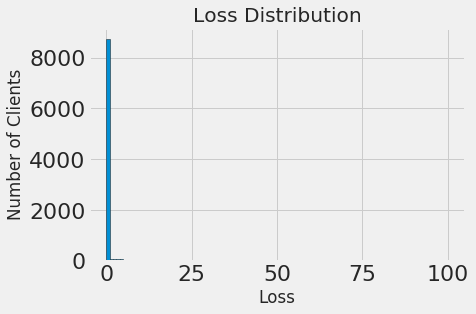

In [29]:
# # Single Variable Plots

figsize=(8, 8)

# Histogram of the loss
plt.style.use('fivethirtyeight')
plt.hist(dfTrain['loss'], bins = 100, edgecolor = 'k')
plt.xlabel('Loss') 
plt.ylabel('Number of Clients');
plt.title('Loss Distribution')

In [31]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_dfTrain = dfTrain.corr()['loss'].sort_values()

# Print the most negative correlations
print(correlations_dfTrain.head(15), '\n')

# Print the most positive correlations
print(correlations_dfTrain.tail(15))

f329   -0.032014
f660   -0.031494
f54    -0.028892
f313   -0.027251
f321   -0.025937
f219   -0.025521
f775   -0.024402
f302   -0.021749
f301   -0.021749
f303   -0.021749
f304   -0.021749
f327   -0.021084
f326   -0.021084
f328   -0.021084
f325   -0.021084
Name: loss, dtype: float64 

f471    0.026466
f556    0.044865
f536    0.079108
loss    1.000000
f33          NaN
f34          NaN
f35          NaN
f37          NaN
f38          NaN
f678         NaN
f700         NaN
f701         NaN
f702         NaN
f736         NaN
f764         NaN
Name: loss, dtype: float64


In [0]:
for i in dfTrain.columns:
    if len(set(dfTrain[i]))==1:
        dfTrain.drop(labels=[i], axis=1, inplace=True)

In [0]:
# # # Feature Engineering and Selection

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between loss
    y = x['loss']
    x = x.drop(columns = ['loss'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['loss'] = y
               
    return x


In [0]:
# Remove the collinear features above a specified correlation coefficient
data = remove_collinear_features(dfTrain, 0.6);

In [36]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = data.drop(columns='loss')
targets = pd.DataFrame(data['loss'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7651, 151)
(1913, 151)
(7651, 1)
(1913, 1)


In [0]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [39]:
X_train


array([[ 1.19876530e+00,  1.55916853e+00, -1.79435354e-01, ...,
        -9.72873041e-01,  9.62283468e-01,  1.59235117e+00],
       [ 1.61613818e-01,  1.33187066e+00, -1.79435354e-01, ...,
        -1.14408177e+00,  6.13237348e-01,  1.59235117e+00],
       [ 3.86850204e-01,  1.33187066e+00, -1.79435354e-01, ...,
         1.19266921e+00,  5.91468283e-01,  1.59235117e+00],
       ...,
       [ 2.14819264e-01, -6.38044230e-01,  9.76657187e-01, ...,
        -1.24941235e+00,  1.52744546e+00, -6.28002175e-01],
       [-1.42745549e+00, -4.86512315e-01,  3.98610917e-01, ...,
        -1.36739750e+00, -3.51919636e-01, -6.28002175e-01],
       [ 8.93366045e-01, -9.41108059e-01,  3.98610917e-01, ...,
         8.24446387e-01, -1.07402362e-03,  1.59235117e+00]])

In [40]:
X_test

array([[ 1.51870738, -0.48651231,  0.97665719, ...,  1.26958907,
         0.22926809, -0.62800218],
       [ 0.08357916, -0.8653421 , -0.17943535, ..., -0.4608597 ,
         0.75385625, -0.62800218],
       [-1.32530103,  1.86223236,  0.39861092, ...,  1.35668221,
         0.50013084, -0.62800218],
       ...,
       [-1.53422108, -0.94110806, -0.17943535, ..., -1.39531196,
        -0.60017961, -0.62800218],
       [ 1.20727817,  1.71070045, -0.17943535, ..., -0.8180408 ,
        -0.25984112,  1.59235117],
       [-0.10583222,  0.80150896,  0.39861092, ...,  1.42218816,
         1.11827966,  1.59235117]])

In [0]:
# # # Models to Evaluate

# We will compare five different machine learning Cassification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross


In [42]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Naive Bayes Performance on the test set: Cross Validation Score = 0.0569


In [44]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Random Forest Performance on the test set: Cross Validation Score = 0.9132


In [45]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.9130
